In [ ]:
#معالجة البيانات
import pandas as pd
import numpy as np
#لإنشاء رسوم بيانية
import seaborn as sns
import matplotlib.pyplot as plt
#لتقسييم البيانات إلى مجموعات إختبار وتدريب
from sklearn.model_selection import train_test_split
#لبناء نموذج
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#لتقييم النموذج
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#تغيير طبيعة البيانات
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#توحيد نطاق البيانات
from sklearn.preprocessing import StandardScaler
#لرسم البياني
import matplotlib.pyplot as plt
import matplotlib

# هنا تم إستيراد المكتبات الازمة
#بفضل الله تعالى

In [ ]:

file_path = "Rehab.xlsx"
df = pd.read_excel(file_path)

# عرض أول 5 صفوف للتأكد أن البيانات صحيحة
df.head()

,مرجع الدليل,النصيحة,الدليل,المشكلة,الجانب الحياتي
0,مرجع الدليل,النصيحة,الدليل,المشكلة,الجانب الحياتي
1,"سورة الشعراء، الآية 13,12",عندما تجد نفسك متأثرًا بكلام الناس الجارح، تذك...,“قَالَ رَبِّ إِنِّي أَخَافُ أَنْ يُكَذِّبُونِ ...,التأثر من الكلام الجارح,الشخصي
2,سورة البقرة، الآية 30,التعالُم ليس علمًا، بل قيد يمنعك من النمو ويزر...,وَإِذْ قَالَ رَبُّكَ لِلْمَلَائِكَةِ إِنِّي جَ...,التعالُم,الشخصي
3,سورة ص، الآية 76,المقارنة تسرق منك نعمة الرضا وتزرع في قلبك بذو...,قَالَ أَنَا خَيْرٌ مِّنْهُ خَلَقْتَنِي مِن نَّ...,المقايسه(المقارنة),الشخصي
4,سورة الإسراء، الآية 61,التكبر هو أول خطوة للبُعد عن رحمةِ الله، كما ف...,قال تعالى: “قَالَ أَأَسْجُدُ لِمَنْ خَلَقْتَ ط...,التكبر,الشخصي


In [ ]:
# حذف الصف الأول
df = df.iloc[1:].reset_index(drop=True)
df.head()

,مرجع الدليل,النصيحة,الدليل,المشكلة,الجانب الحياتي
0,"سورة الشعراء، الآية 13,12",عندما تجد نفسك متأثرًا بكلام الناس الجارح، تذك...,“قَالَ رَبِّ إِنِّي أَخَافُ أَنْ يُكَذِّبُونِ ...,التأثر من الكلام الجارح,الشخصي
1,سورة البقرة، الآية 30,التعالُم ليس علمًا، بل قيد يمنعك من النمو ويزر...,وَإِذْ قَالَ رَبُّكَ لِلْمَلَائِكَةِ إِنِّي جَ...,التعالُم,الشخصي
2,سورة ص، الآية 76,المقارنة تسرق منك نعمة الرضا وتزرع في قلبك بذو...,قَالَ أَنَا خَيْرٌ مِّنْهُ خَلَقْتَنِي مِن نَّ...,المقايسه(المقارنة),الشخصي
3,سورة الإسراء، الآية 61,التكبر هو أول خطوة للبُعد عن رحمةِ الله، كما ف...,قال تعالى: “قَالَ أَأَسْجُدُ لِمَنْ خَلَقْتَ ط...,التكبر,الشخصي
4,سورة إبراهيم، الآية 22,كيد الشيطان يبدأ بالوعد وينتهي بالضياع، فلا تف...,\n وَقَالَ ٱلشَّيۡطَٰنُ لَمَّا قُضِيَ ٱلۡأَمۡر...,الاستسلام لكيد الشيطان,الشخصي


In [ ]:
# تحقق من وجود  القيم الفارغة
missing_values = df.isnull().sum()
print(missing_values)


مرجع الدليل       0
النصيحة           0
الدليل            0
المشكلة           0
الجانب الحياتي    0
dtype: int64


In [ ]:

# حذف الأعمدة Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# عرض الأعمدة للتأكد من الحذف
print(df.columns)


Index(['مرجع الدليل', 'النصيحة', 'الدليل', 'المشكلة  ', 'الجانب الحياتي'], dtype='object')


In [ ]:
print(df.columns)

Index(['مرجع الدليل', 'النصيحة', 'الدليل', 'المشكلة  ', 'الجانب الحياتي'], dtype='object')


In [ ]:
#إزالة المسافات من أسماء الأعمدة
df.columns = df.columns.str.strip()


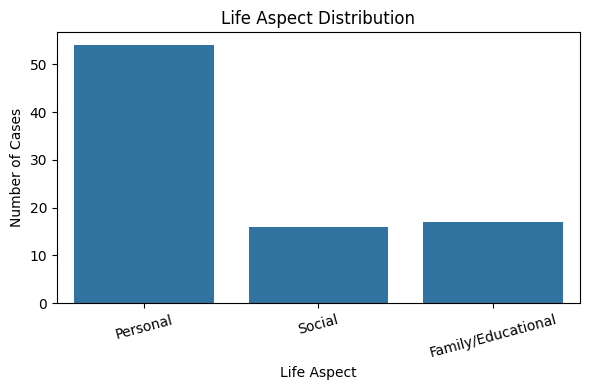

In [ ]:
df["الجانب الحياتي"] = df["الجانب الحياتي"].astype(str).str.strip()

# ترجمة القيم من العربية إلى الإنجليزية
df["الجانب الحياتي"] = df["الجانب الحياتي"].replace({
    "الشخصي": "Personal",
    "الإجتماعي": "Social",
    "الأسري والتربوي": "Family/Educational"
})

# رسم مباشر بعد الترجمة
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="الجانب الحياتي")
plt.title("Life Aspect Distribution")
plt.xlabel("Life Aspect")
plt.ylabel("Number of Cases")
plt.xticks(rotation=15)  # لف النص لو طويل
plt.tight_layout()
plt.show()


In [ ]:
# إرجاع الأسماء إلى العربية بعد الرسم
df['الجانب الحياتي'] = df['الجانب الحياتي'].replace({
    "Personal": "الشخصي",
    "Social": "الإجتماعي",
    "Family/Educational": "الأسري وتربوي"
})


In [ ]:
print(df['الجانب الحياتي'].unique())


['الشخصي' 'الإجتماعي' 'الأسري وتربوي']


In [ ]:
#حتى يسهل علي بفضل الله  تحقيق هدف أن المشروع

# إنشاء عمود جديد يحتوي على معلومات البطاقة
df['البطاقة'] = (
    "المشكلة: " + df['المشكلة'].astype(str) + "\n" +
    "النصيحة: " + df['النصيحة'].astype(str) + "\n" +
    "الدليل: " + df['الدليل'].astype(str) + "\n" +
    "مرجع الدليل: " + df['مرجع الدليل'].astype(str) + "\n"

)


In [ ]:
print(df.columns)

Index(['مرجع الدليل', 'النصيحة', 'الدليل', 'المشكلة', 'الجانب الحياتي',
       'البطاقة'],
      dtype='object')


In [ ]:
#حفظ الملف بعد التعديل
df.to_excel("Basirat_Al_Anbiya.xlsx", index=False)

from google.colab import files
files.download("Basirat_Al_Anbiya.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>